## Lab 6 - Classification

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#settings for seaborn plots
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(11,6)})

#code to ensure path
try:
  drive_path
except NameError:
  drive_path = ''

#load dataset
df = pd.read_csv(drive_path + 'diabetes_risk_prediction_dataset.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


## Data Exploration

In [3]:
#understanding rows and attribute types
print('No. of records and attributes: ',df.shape)
print('List of attributes: ',df.columns)
display(df.info())

No. of records and attributes:  (520, 17)
List of attributes:  Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itc

None

In [4]:
#exploring basic distribution of numerical data
df.select_dtypes(['int64','float64']).describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [5]:
#exploring categotical data
df.select_dtypes(['object']).describe()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320


In [6]:
#check values of each categorical attribute
cat_attributes = df.select_dtypes(['object']).columns
for i in cat_attributes:
  values = df[i].unique().tolist()
  print(i,': ',values)

Gender :  ['Male', 'Female']
Polyuria :  ['No', 'Yes']
Polydipsia :  ['Yes', 'No']
sudden weight loss :  ['No', 'Yes']
weakness :  ['Yes', 'No']
Polyphagia :  ['No', 'Yes']
Genital thrush :  ['No', 'Yes']
visual blurring :  ['No', 'Yes']
Itching :  ['Yes', 'No']
Irritability :  ['No', 'Yes']
delayed healing :  ['Yes', 'No']
partial paresis :  ['No', 'Yes']
muscle stiffness :  ['Yes', 'No']
Alopecia :  ['Yes', 'No']
Obesity :  ['Yes', 'No']
class :  ['Positive', 'Negative']


<AxesSubplot: xlabel='class', ylabel='count'>

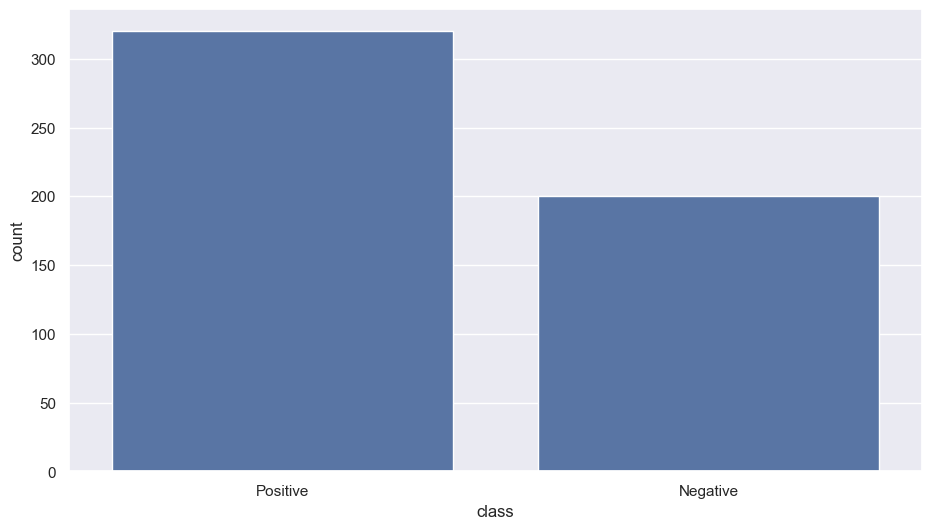

In [7]:
sns.countplot(x='class', data = df)

In [9]:
#replace with NaN
df_cat = df.select_dtypes(['object'])
df_cat.replace(['unknown','nonexistent'],np.nan,inplace=True)
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              520 non-null    object
 1   Polyuria            520 non-null    object
 2   Polydipsia          520 non-null    object
 3   sudden weight loss  520 non-null    object
 4   weakness            520 non-null    object
 5   Polyphagia          520 non-null    object
 6   Genital thrush      520 non-null    object
 7   visual blurring     520 non-null    object
 8   Itching             520 non-null    object
 9   Irritability        520 non-null    object
 10  delayed healing     520 non-null    object
 11  partial paresis     520 non-null    object
 12  muscle stiffness    520 non-null    object
 13  Alopecia            520 non-null    object
 14  Obesity             520 non-null    object
 15  class               520 non-null    object
dtypes: object(16)
memory usage

<AxesSubplot: >

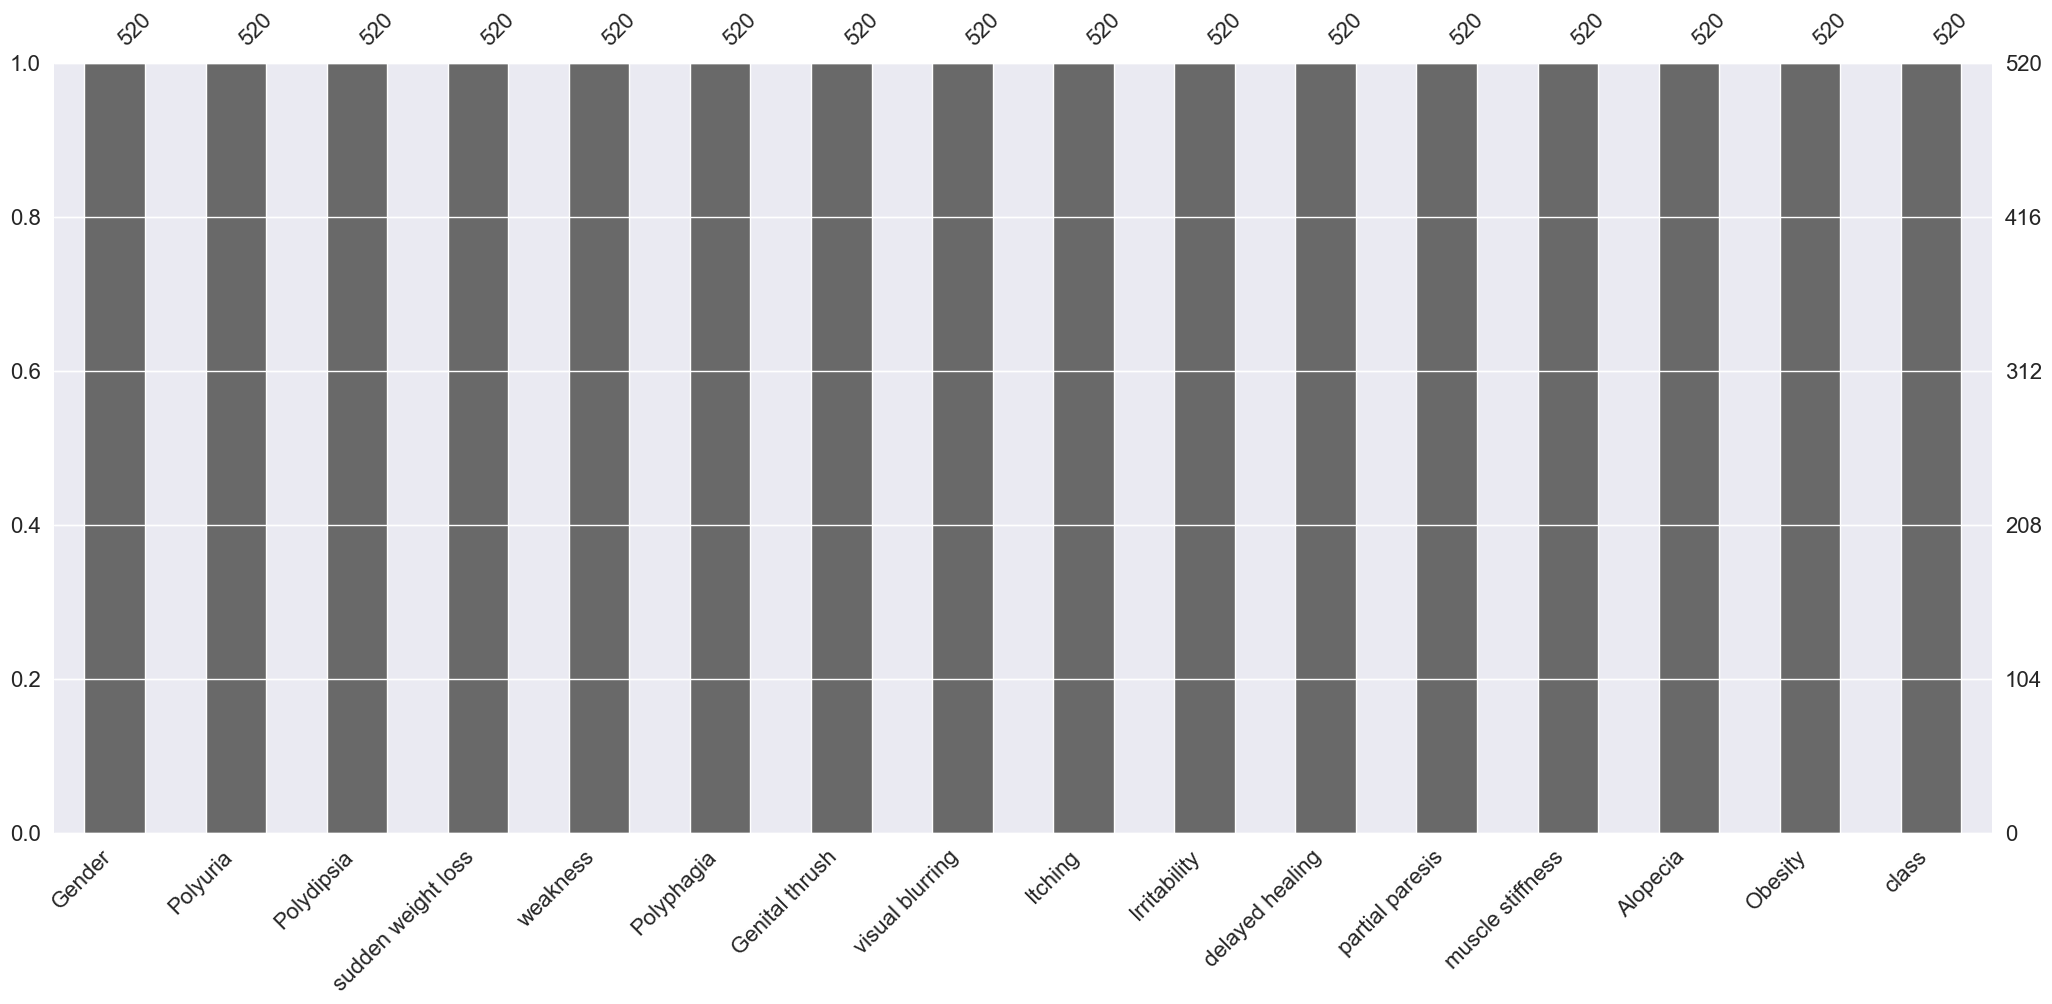

In [10]:
import missingno as msno

msno.bar(df_cat) #visualilze missing data in categorical attributes

## Data Preprocessing

In [13]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

df_pp = df.copy()
X = df_pp.loc[:, df_pp.columns != 'y']
y = df_pp.loc[:, df_pp.columns == 'y']
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0, stratify=y)
#use stratification to ensure each class sampled as testing set

ValueError: Found input variables with inconsistent numbers of samples: [520, 0]